In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read in CSV file
df = pd.DataFrame(pd.read_csv('../resources/acquisitions.csv'))
df = df[df['AcquisitionMonthDate'].notna()].reset_index()
df = df.astype({'AcquisitionMonthDate': 'int32'})
df.head()

,index,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany
0,0,ACQ99,November,11,2015,bebop,Cloud software,USA,380000000.0,Google Cloud Platform,Google
1,1,ACQ98,November,11,2015,Fly Labs,Video editing,USA,NaN,Google Photos,Google
2,2,ACQ97,December,8,2015,Clearleap,Cloud-based video management,USA,NaN,NaN,IBM
3,3,ACQ96,December,18,2015,Metanautix,Big Data Analytics,USA,NaN,NaN,Microsoft
4,4,ACQ95,December,21,2015,"Talko, Inc.",Mobile communications,USA,NaN,NaN,Microsoft


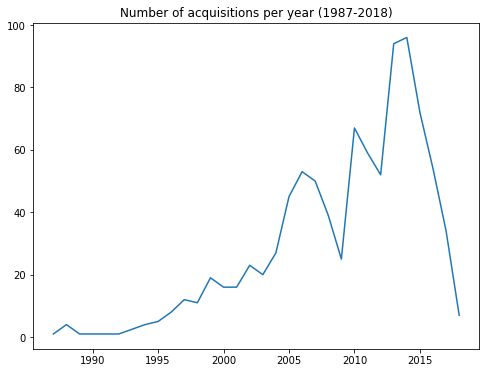

In [24]:
#create acquisitions_per_year series
acquisitions_per_year = df['AcquisitionYear'].value_counts().sort_index()
#plot acquisitions_per_year using pandas
acquisitions_per_year.plot(kind='line',title='Number of acquisitions per year (1987-2018)',figsize=(8,6))

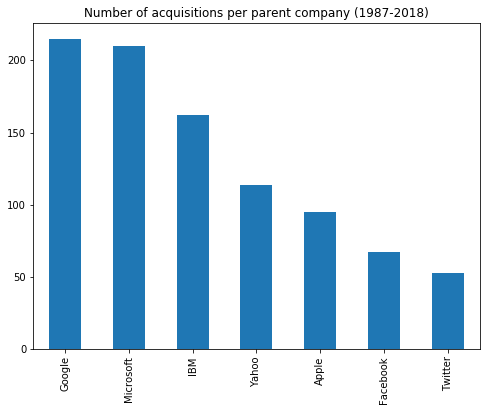

In [29]:
#plot number of acquisitions per parent company
df['ParentCompany'].value_counts()\
    .plot(kind='bar'\
    ,title='Number of acquisitions per parent company (1987-2018)'\
    ,figsize=(8,6))

In [3]:
#create date column to using to_datetime
df['Date'] = pd.to_datetime(df['AcquisitionYear'].astype(str) + 
                            df['AcquisitionMonth'] + 
                            df['AcquisitionMonthDate'].astype(str), 
                            format='%Y%B%d', 
                            errors='coerce')
df.head()

,index,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany,Date
0,0,ACQ99,November,11,2015,bebop,Cloud software,USA,380000000.0,Google Cloud Platform,Google,2015-11-11
1,1,ACQ98,November,11,2015,Fly Labs,Video editing,USA,NaN,Google Photos,Google,2015-11-11
2,2,ACQ97,December,8,2015,Clearleap,Cloud-based video management,USA,NaN,NaN,IBM,2015-12-08
3,3,ACQ96,December,18,2015,Metanautix,Big Data Analytics,USA,NaN,NaN,Microsoft,2015-12-18
4,4,ACQ95,December,21,2015,"Talko, Inc.",Mobile communications,USA,NaN,NaN,Microsoft,2015-12-21


In [4]:
#create DF for only records with listed company values
listed_values = df[df['Value (USD)'].notna()].reset_index()
listed_values.head()

,level_0,index,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany,Date
0,0,0,ACQ99,November,11,2015,bebop,Cloud software,USA,380000000.0,Google Cloud Platform,Google,2015-11-11
1,8,8,ACQ915,July,30,1987,"Forethought, Inc.",Computer software,USA,14000000.0,NaN,Microsoft,1987-07-30
2,28,28,ACQ898,January,16,1996,Vermeer Technologies,Software,USA,133000000.0,NaN,Microsoft,1996-01-16
3,32,32,ACQ894,April,23,1996,Aspect Software Engineering,Computer software,USA,14150000.0,NaN,Microsoft,1996-04-23
4,36,36,ACQ890,February,3,1997,NetCarta,Internet software,USA,20000000.0,NaN,Microsoft,1997-02-03


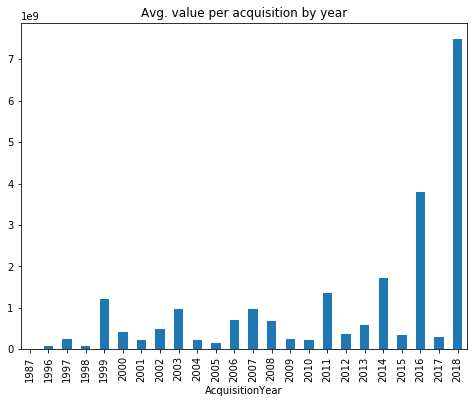

In [5]:
#plot bar graph of mean acquisition value by year
total_value_year = listed_values.groupby('AcquisitionYear')['Value (USD)'].mean().sort_index()
total_value_year.plot(kind='bar', figsize=(8,6), title='Avg. value per acquisition by year')

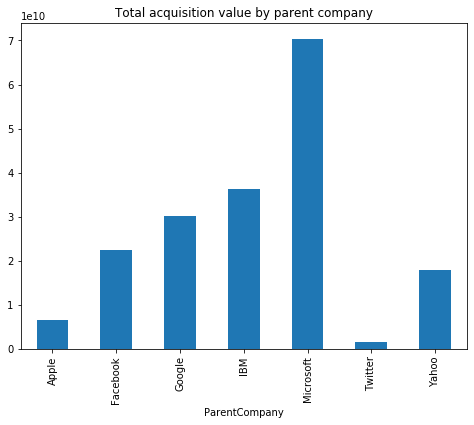

In [7]:
#plot bar graph of total acquisition value by parent company
total_value_year = listed_values.groupby('ParentCompany')['Value (USD)'].sum().sort_index()
total_value_year.plot(kind='bar', figsize=(8,6), title='Total acquisition value by parent company')

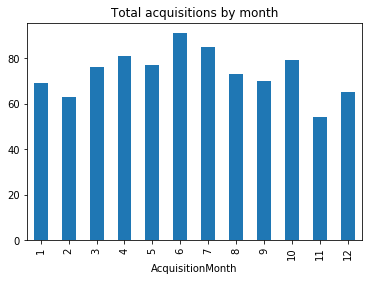

In [46]:
#Convert months to int
#Account for typos, like mispelled 'February'
int_month = df.replace({'January':1,'Feburary':2,'February':2,'March':3,'April':4,
                        'May':5,'June':6,'July':7,'August':8,'September':9,
                        'October':10,'November':11,'December':12})

#Plot number of acquisitions by month
int_month.groupby('AcquisitionMonth').size().plot(kind='bar',title='Total acquisitions by month')

January, February, and March (Q1)
April, May, and June (Q2)
July, August, and September (Q3)
October, November, and December (Q4)

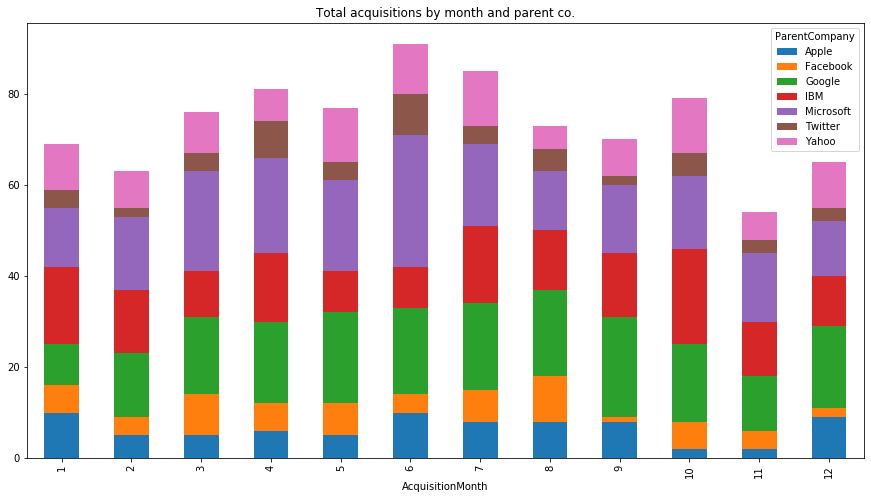

In [83]:
#Group by month and company, and create stacked bar chart
int_month.groupby(['AcquisitionMonth','ParentCompany'])\
    .size().unstack('ParentCompany')\
    .plot.bar(stacked=True, title='Total acquisitions by month and parent co.', figsize=(15,8))

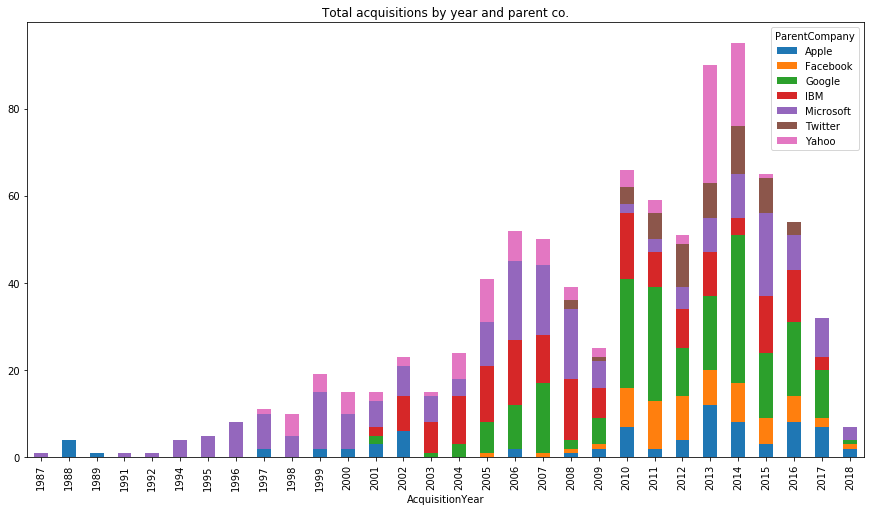

In [85]:
#Group by year and company, and create stacked bar chart
int_month.groupby(['AcquisitionYear','ParentCompany'])\
    .size().unstack('ParentCompany')\
    .plot.bar(stacked=True, title='Total acquisitions by year and parent co.', figsize=(15,8))

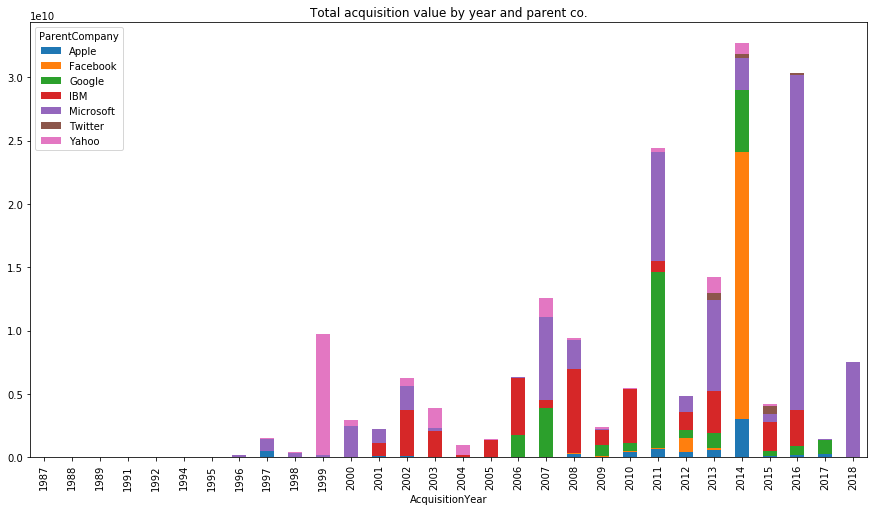

In [91]:
#Group by year and company, and create stacked bar chart based on value
int_month.groupby(['AcquisitionYear','ParentCompany'])\
    ['Value (USD)'].sum().unstack('ParentCompany')\
    .plot.bar(stacked=True, title='Total acquisition value by year and parent co.', figsize=(15,8))

In [95]:
df.loc[df['Value (USD)'].argmax()]

index                                               558
AcquisitionID                                     ACQ42
AcquisitionMonth                               December
AcquisitionMonthDate                                  8
AcquisitionYear                                    2016
Company                                        LinkedIn
Business                Professional Networking Service
Country                                             USA
Value (USD)                                    2.62e+10
Derived products                                    NaN
ParentCompany                                 Microsoft
Date                                2016-12-08 00:00:00
Name: 540, dtype: object

In [111]:
#Display top 10 most valuable aquisitions
most_valueable = df[['ParentCompany','Company','Value (USD)','Date']]\
    .sort_values('Value (USD)', ascending=False).reset_index(drop=True).head(10)
most_valueable

,ParentCompany,Company,Value (USD),Date
0,Microsoft,LinkedIn,2.620000e+10,2016-12-08
1,Facebook,WhatsApp,1.900000e+10,2014-02-19
2,Google,Motorola Mobility,1.250000e+10,2011-08-15
3,Microsoft,Skype Technologies,8.500000e+09,2011-05-10
4,Microsoft,Github,7.500000e+09,2018-06-04
5,Microsoft,Nokia mobile phones unit,7.200000e+09,2013-09-02
6,Microsoft,aQuantive,6.333000e+09,2007-08-13
7,Yahoo,Broadcast.com,5.700000e+09,1999-04-01
8,IBM,Cognos,5.000000e+09,2008-01-31
9,Yahoo,GeoCities,3.600000e+09,1999-05-28


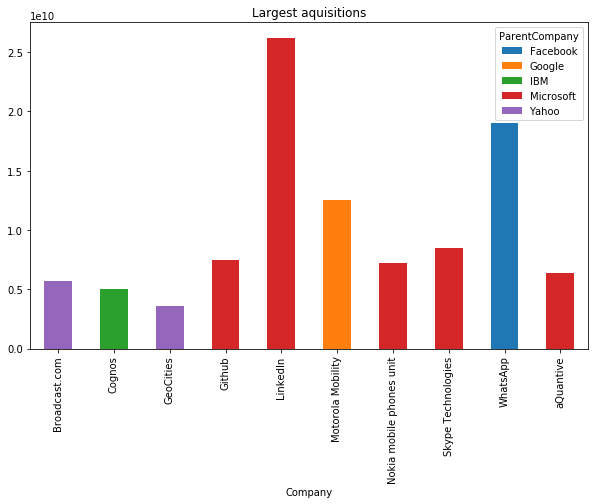

In [134]:
#TODO: sort from largest to smallest
most_valueable.groupby(['ParentCompany','Company'])['Value (USD)']\
    .sum().unstack('ParentCompany')\
    .plot.bar(stacked=True, title='Largest aquisitions', figsize=(10,6))